# Alternus Vera 

 

-----

GitHub URL: 


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).

### Process 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Sentiment Analysis 
- **Feature 2 :** LDA Topic Modelling
- **Feature 3 :** Sensationalism 
- **Feature 4 :** Political Affiliation 
- **Feature 5 :** Clickbait 
- **Feature 6 :** Spam 
- **Feature 7 :** Author Credibility 
- **Feature 8 :** Source Reputation
- **Feature 9 :** Content Length     
- **Feature 10 :** Word Frequency 
- Vector Classification Modeling 
- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection
**List top Features Selected based on research articles**



### Team Contributions example:

|Features  |  Member |
|-----|-----|
| Feature name(s)                         |  Member name(s) |  
| Feature name(s)                 |  Member name(s) | 
| Feature name(s)                   |  Member name(s)  |   
| Feature name(s)                             |  Member name(s) |

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 


#### What did I try and What worked? 

> Explain your work ...

#### What did not work?

> Explain your work ...


#### What alternatives did you try?

> Explain your work 

----

### Reading the Data

In [1]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from scipy import sparse
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmeline.tsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emmeline.tsen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/emmeline.tsen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emmeline.tsen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emmeline.tsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Read the test, training and valid data from files
# Header = 0 indicates that the first line of the file contains column names,
# As there is no Header, create a column names for each column in the dataset
# delimiter = \t indicates that the fields are seperated by tabs, and 


test_filename = 'input_data/dataset/test.tsv'
train_filename = 'input_data/dataset/train.tsv'
valid_filename = 'input_data/dataset/valid.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

In [7]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

('train dim:', (10240, 14), 'test dim:', (1267, 14))


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


In [43]:
train_news.head(10)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

###  Putting It All Together 

To make the code reusable, we need to create a function that can be called many times.

In [8]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [13]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")

('\nTime to clean, tokenize and stem train data: \n', 10240, 'news:', 0.1753629167874654, 'min')
('\n\nTime to clean, tokenize and stem test data: \n', 1267, 'news:', 0.017542934417724608, 'min')
('\n\nTime to clean, tokenize and stem valid data: \n', 1284, 'news:', 0.017336467901865642, 'min')


### [Google News corpus word2vec](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)

### Spell Check 

-  You can download the pre-trained model [**here**](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

- Or clone it from GitHub [**GoogleNews-vectors-negative300**](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)

> It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

**3 million words * 300 features * 4bytes/feature = ~3.35GB**

> This file consist of the word2vec -  pre-trained Google News corpus (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

> Look at the [**vocabulory list**](https://github.com/chrisjmccormick/inspect_word2vec/tree/master/vocabulary) used to train this model. Each text file contains 100,000 entries from the model. 


>  There are few things that this dataset contains and not. It has stop words like  “the”, “also”, “should” and does not have stop words like “a”, “and”, “of”. As I have removed the stop words the complexity is reduced as there is no need to check the spelling for stop words. 

> It does have numbers but in the form of entried wiht #. e.g., you won’t find “100”. But it does include entries like “###MHz_DDR2_SDRAM”. 

The model used [**WinPython-64bit-2.7.10.3**](https://winpython.github.io/) for efficient python distribution on Windows system. Helps to run the scripts in batches. 

In [16]:
model = gensim.models.KeyedVectors.load_word2vec_format('input_data/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [17]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [18]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [19]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \nn", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

('Before: \n', u'say anni list polit group support third trimest abort demand')
('\nTime to spell check the train data: \n', 10240, 'news:', 4.258477918306986, 'min')
('\nAfter: \n', u'say anni list polit group support third trimmest abort demand')


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [20]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

('\nTime to spell check the test data: \n', 1267, 'news:', 0.49099040031433105, 'min')


In [21]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")

('\nTime to spell check the valid data: \n', 1284, 'news:', 0.5293145656585694, 'min')


##### Saved the trained dataset into a seperate CSV file 

In [22]:
train_news.to_csv("input_data/train_processed.csv", sep=',')
test_news.to_csv("input_data/test_processed.csv", sep=',')
valid_news.to_csv("input_data/valid_processed.csv", sep=',')

### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

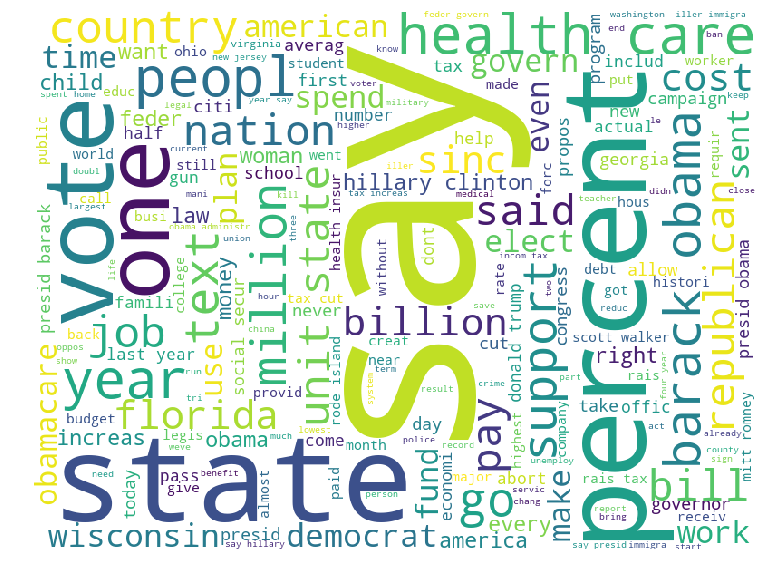

In [25]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

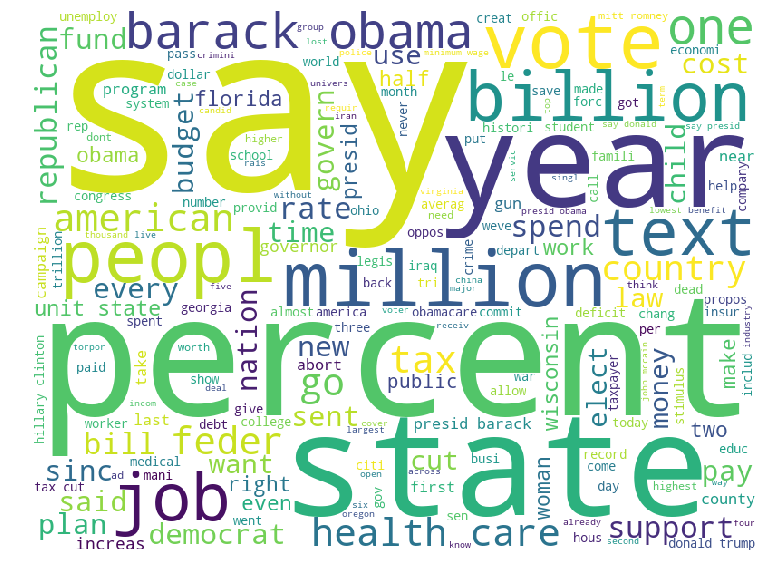

In [26]:
cloud(' '.join(test_news['clean']))

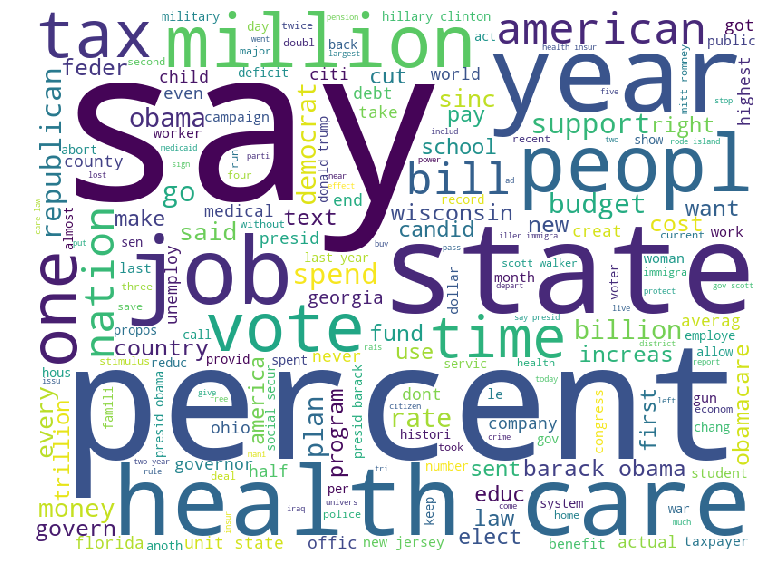

In [27]:
cloud(' '.join(valid_news['clean']))

#### Inferences from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus


# Feature 1: Sentiment analysis 

#### Using Vader Sentiment Analyser

##### [Sentiment Intensity Analyzer](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)


> VADER, or the **Valence Aware Dictionary and sEntiment Reasoner** has created a package that performes sentiment analysis using the polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach

- It is based on lexicons of sentiment-related word.
- The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories.
- The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [30]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

say anni list polit group support third trimmest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


In [31]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [32]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

- senti.polarity_scores is a dictionary
- pos and neg indicates - positive and negative emotions in sentence
- we should be interested in compound score which calculates the final effect

In [33]:
sentiment = []
vader_pol = []
cmp_score = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol
train_news['sentiment_score'] = cmp_score

[0, 0.123, 0.656, 0.221, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.645, 0.194, 0.128]
[1, 0.0, 0.438, 0.563, 0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.335, 0.6, 0.065, -0.7506]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.915, 0.0, -0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.667, 0.333, 0.6124]
[0, 0.32, 0.68, 0.0, -0.5106]
[0, 0.153, 0.657, 0.19, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.2, 0.522, 0.278, 0.2263]
[0, 0.108, 0.773, 0.119, 0.0516]
[0, 0.198, 0.802, 0.0, -0.4939]
[0, 0.0, 0.625, 0.375, 0.7184]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 0.543, 0.457, 0.6369]
[0, 0.15, 0.429, 0.421, 0.5859]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.507, 0.493, 0.0, -0.802]
[0, 0.0, 0.859, 0.141, 0.2411]
[0, 0.238, 0.495, 0.267, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.199, 0.588, 0.213, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.184, 0.702, 0.114, -0.2033]
[0, 0.0, 1.0, 0.0, 0.0]


[0, 0.485, 0.515, 0.0, -0.5719]
[0, 0.0, 0.839, 0.161, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.67, 0.33, 0.7096]
[0, 0.156, 0.782, 0.062, -0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.927, 0.073, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.748, 0.252, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.213, 0.787, 0.0, -0.4019]
[0, 0.354, 0.472, 0.173, -0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.71, 0.29, 0.6486]
[0, 0.113, 0.887, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.167, 0.833, 0.0, -0.34]
[0, 0.5, 0.5, 0.0, -0.7906]
[0, 0.0, 0.833, 0.167, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.121, 0.645, 0.234, 0.34]
[0, 0.0, 0.833, 0.167, 0.4939]
[0, 0.366, 0.634, 0.0, -0.7579]
[0, 0.141, 0.606, 0.253, 0.2732]
[0, 0.32, 0.68, 0.0, -0.6908]
[0, 0.167, 0.833, 0.0, -0

[-1, 0.588, 0.412, 0.0, -0.875]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.196, 0.804, 0.0, -0.296]
[0, 0.0, 0.811, 0.189, 0.2732]
[0, 0.184, 0.816, 0.0, -0.4019]
[0, 0.0, 0.802, 0.198, 0.4939]
[0, 0.211, 0.789, 0.0, -0.34]
[0, 0.172, 0.828, 0.0, -0.4019]
[0, 0.112, 0.888, 0.0, -0.34]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.468, 0.439, 0.093, -0.8271]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.203, 0.451, 0.346, 0.2263]
[0, 0.264, 0.736, 0.0, -0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.187, 0.813, 0.0, -0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.426, 0.574, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.746, 0.254, 0.5267]
[0, 0.055, 0.472, 0.472, 0.891]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.803, 0.197, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.462, 0.538, 0.0, -0.6486]
[0, 0.0, 0.902, 0.098, 0.0772]
[0, 0.0, 0.753, 0

[0, 0.0, 0.756, 0.244, 0.4404]
[0, 0.2, 0.8, 0.0, -0.3612]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.828, 0.172, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.619, 0.381, 0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.719, 0.281, 0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.901, 0.099, 0.0258]
[0, 0.234, 0.766, 0.0, -0.6369]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.652, 0.348, 0.4939]
[0, 0.31, 0.69, 0.0, -0.4019]
[0, 0.0, 0.756, 0.244, 0.4404]
[0, 0.0, 0.824, 0.176, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.588, 0.412, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.286, 0.714, 0.0, -0.4215]
[-1, 0.368, 0.316, 0.316, -0.1285]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.108, 0.615, 0.277, 0.296]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.

[0, 0.463, 0.537, 0.0, -0.7845]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.618, 0.382, 0.0, -0.8442]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.484, 0.516, 0.7506]
[-1, 0.787, 0.213, 0.0, -0.8126]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.4939]
[0, 0.0, 0.783, 0.217, 0.3612]
[0, 0.222, 0.506, 0.272, -0.0516]
[0, 0.0, 0.87, 0.13, 0.0516]
[0, 0.304, 0.696, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.434, 0.395, 0.171, -0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.237, 0.763, 0.0, -0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.649, 0.351, 0.4019]
[0, 0.0, 0.884, 0.116, 0.1779]
[0, 0.0, 0.789, 0.211, 0.34]
[0, 0.368, 0.545, 0.086, -0.7351]
[0, 0.444, 0.556, 0.0, -0.6808]
[0, 0.0, 0.606, 0.394, 0.7783]
[0, 0.225, 0.775, 0.0, -0.52]
[0, 0.307, 0.693, 0.0, -0.4767]
[-1, 0.558, 0.442, 0.0, -0.743]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.244, 0.756, 0.0, -0.6369]
[0, 0.0, 0.641, 0.359, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.845, 0.155, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]

[0, 0.278, 0.722, 0.0, -0.4019]
[-1, 0.501, 0.499, 0.0, -0.9524]
[0, 0.0, 0.553, 0.447, 0.836]
[0, 0.107, 0.687, 0.206, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.343, 0.657, 0.0, -0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.602, 0.398, 0.5106]
[0, 0.25, 0.643, 0.107, -0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.111, 0.741, 0.148, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.351, 0.649, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.227, 0.523, 0.25, -0.1531]
[0, 0.157, 0.672, 0.172, 0.0516]
[0, 0.0, 0.808, 0.192, 0.2263]
[0, 0.166, 0.688, 0.146, -0.128]
[0, 0.2, 0.8, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.839, 0.161, 0.3612]
[0, 0.155, 0.727, 0.118, -0.1027]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.206, 0.794, 0.0, -0.3818]
[0, 0.0, 0.763, 0.237, 0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.302, 0.698, 0.0, -0.6369]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0,

[0, 0.394, 0.606, 0.0, -0.3818]
[0, 0.208, 0.708, 0.084, -0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.756, 0.244, 0.4939]
[0, 0.25, 0.75, 0.0, -0.25]
[0, 0.163, 0.837, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.179, 0.821, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.406, 0.594, 0.0, -0.6249]
[1, 0.289, 0.333, 0.378, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.719, 0.281, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.29, 0.538, 0.172, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.302, 0.698, 0.0, -0.3818]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.896, 0.104, 0.2732]
[0, 0.152, 0.652, 0.196, 0.1531]
[0, 0.0, 0.577, 0.423, 0.765]
[0, 0.0, 0.661, 0.339, 0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.08, 0.92, 0.0, -0.1027]
[0, 0.104, 0.732, 0.165, 0.25]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.795, 0.205, 0.2023]
[0, 0.317, 0.484, 0.

[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.645, 0.355, 0.0, -0.8779]
[-1, 0.744, 0.256, 0.0, -0.9118]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.313, 0.556, 0.131, -0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.852, 0.148, 0.3818]
[0, 0.343, 0.657, 0.0, -0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.645, 0.355, 0.5267]
[0, 0.293, 0.707, 0.0, -0.4404]
[0, 0.16, 0.535, 0.305, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.188, 0.684, 0.128, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.642, 0.273, 0.5445]
[0, 0.0, 0.769, 0.231, 0.2023]
[0, 0.185, 0.664, 0.152, -0.1779]
[0, 0.304, 0.696, 0.0, -0.5423]
[0, 0.358, 0.642, 0.0, -0.5994]
[0, 0.206, 0.581, 0.213, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.809, 0.191, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.119, 0.734, 0.147, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.416, 0.458, 0.126, -0.6197]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0,

[0, 0.485, 0.515, 0.0, -0.886]
[0, 0.127, 0.636, 0.236, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.196, 0.467, 0.336, 0.3612]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.443, 0.557, 0.0, -0.7306]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.209, 0.791, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.476, 0.524, 0.872]
[0, 0.437, 0.563, 0.0, -0.8439]
[0, 0.342, 0.658, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.685, 0.315, 0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.14, 0.676, 0.184, 0.2263]
[0, 0.125, 0.714, 0.161, 0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.781, 0.219, 0.0, -0.9571]
[0, 0.0, 0.551, 0.449, 0.9081]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.567, 0.433, 0.0, -0.9201]
[0, 0.0, 0.792, 0.208, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.37, 0.63, 0.0, -0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.775, 0.225, 0.4404]
[0, 0.0, 0.652, 0.348, 0.4939]
[0, 0.123, 0.877, 0.0, -0.1027]
[0, 0.0, 0.879, 0.121, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.

[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.462, 0.538, 0.7906]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.37, 0.528, 0.102, -0.765]
[0, 0.0, 0.556, 0.444, 0.4939]
[0, 0.15, 0.701, 0.15, 0.0]
[0, 0.0, 0.667, 0.333, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.157, 0.698, 0.145, -0.0516]
[0, 0.225, 0.53, 0.245, -0.1779]
[0, 0.085, 0.915, 0.0, -0.1027]
[0, 0.42, 0.58, 0.0, -0.4404]
[1, 0.222, 0.354, 0.424, 0.4588]
[0, 0.254, 0.538, 0.208, -0.1531]
[0, 0.497, 0.503, 0.0, -0.872]
[0, 0.331, 0.669, 0.0, -0.836]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.762, 0.238, 0.3612]
[0, 0.226, 0.565, 0.209, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.915, 0.0, -0.1027]
[0, 0.129, 0.675, 0.196, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.119, 0.881, 0.0, -0.3182]
[0, 0.0, 0.733, 0.267, 0.7351]
[0, 0.0, 0.872, 0.128, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0,

[1, 0.0, 0.417, 0.583, 0.6369]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.219, 0.781, 0.0, -0.2023]
[0, 0.0, 0.592, 0.408, 0.7351]
[0, 0.135, 0.865, 0.0, -0.1027]
[0, 0.0, 0.884, 0.116, 0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.775, 0.225, 0.4939]
[0, 0.304, 0.696, 0.0, -0.5423]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.223, 0.777, 0.0, -0.3182]
[0, 0.259, 0.741, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.106, 0.758, 0.136, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.221, 0.574, 0.205, -0.0516]
[0, 0.0, 0.803, 0.197, 0.4019]
[0, 0.104, 0.896, 0.0, -0.2732]
[0, 0.125, 0.875, 0.0, -0.4588]
[0, 0.119, 0.625, 0.256, 0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.755, 0.245, 0.0772]
[-1, 0.522, 0.478, 0.0, -0.8979]
[0, 0.115, 0.769, 0.115, 0.0]
[0, 0.244, 0.756, 0.0, -0.4939]
[0, 0.299, 0.701, 0.0, -0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.714, 0.286, 0.4939]
[0, 0.0, 0.675, 0.325, 0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.29, 0.546, 0.164, -0

[0, 0.287, 0.648, 0.065, -0.7579]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.758, 0.242, 0.4939]
[0, 0.495, 0.505, 0.0, -0.5994]
[0, 0.0, 0.791, 0.209, 0.4404]
[0, 0.0, 0.813, 0.187, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.2, 0.359, 0.441, 0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.528, 0.472, 0.0, -0.6808]
[0, 0.065, 0.794, 0.14, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.226, 0.774, 0.0, -0.4449]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.197, 0.524, 0.279, 0.2363]
[0, 0.471, 0.529, 0.0, -0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.213, 0.787, 0.0, -0.4019]
[0, 0.104, 0.896, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.556, 0.444, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.467, 0.533, 0.0, -0.5423]
[0, 0.204, 0.796, 0.0, -0.3182]
[0, 0.161, 0.518, 0.321, 0.4767]
[0, 0.0, 0.824, 0.176, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.178, 0.822, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 

[-1, 0.537, 0.463, 0.0, -0.8625]
[0, 0.174, 0.826, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.513, 0.352, 0.136, -0.8176]
[0, 0.0, 0.806, 0.194, 0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.467, 0.533, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.885, 0.115, 0.0772]
[0, 0.0, 0.833, 0.167, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.474, 0.526, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.745, 0.093, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.752, 0.248, 0.5106]
[0, 0.187, 0.642, 0.171, -0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.795, 0.205, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.2, 0.8, 0.0, -0.3612]
[0, 0.474, 0.526, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.166, 0.491, 0.344, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.658, 0.342, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.313, 

[0, 0.0, 0.632, 0.368, 0.7506]
[0, 0.0, 0.667, 0.333, 0.3612]
[0, 0.485, 0.515, 0.0, -0.6908]
[0, 0.231, 0.769, 0.0, -0.2732]
[0, 0.0, 0.783, 0.217, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.254, 0.746, 0.0, -0.5267]
[-1, 0.583, 0.417, 0.0, -0.8689]
[0, 0.298, 0.702, 0.0, -0.5267]
[0, 0.0, 0.609, 0.391, 0.872]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.394, 0.606, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.216, 0.784, 0.0, -0.296]
[0, 0.355, 0.645, 0.0, -0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.463, 0.537, 0.0, -0.8807]
[0, 0.0, 0.807, 0.193, 0.6908]
[0, 0.0, 0.879, 0.121, 0.296]
[0, 0.117, 0.711, 0.173, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.815, 0.185, 0.3612]
[0, 0.241, 0.759, 0.0, -0.5423]
[0, 0.157, 0.843, 0.0, -0.3818]
[0, 0.0, 0.784, 0.216, 0.7845]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.128, 0.732, 0.14, 0.0516]
[0, 0.0, 0.575, 0.425, 0.5719]
[0, 0.0, 0.838, 0.162, 0.4019]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.28, 0.72, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0

[0, 0.198, 0.661, 0.14, -0.1779]
[0, 0.135, 0.865, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.472, 0.528, 0.6808]
[0, 0.0, 0.842, 0.158, 0.128]
[0, 0.186, 0.531, 0.283, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.781, 0.219, 0.1027]
[0, 0.0, 0.61, 0.39, 0.4939]
[0, 0.0, 0.556, 0.444, 0.4939]
[0, 0.151, 0.649, 0.2, 0.2263]
[1, 0.0, 0.374, 0.626, 0.8934]
[0, 0.115, 0.492, 0.393, 0.5267]
[0, 0.0, 0.615, 0.385, 0.6142]
[0, 0.291, 0.709, 0.0, -0.4019]
[0, 0.0, 0.645, 0.355, 0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.152, 0.848, 0.0, -0.3612]
[0, 0.0, 0.606, 0.394, 0.3818]
[0, 0.0, 0.62, 0.38, 0.5994]
[0, 0.16, 0.84, 0.0, -0.2732]
[0, 0.216, 0.784, 0.0, -0.6705]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.574, 0.426, 0.0, -0.6597]
[0, 0.0, 0.777, 0.223, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.759, 0.241, 0.2263]
[0, 0.165, 0.647, 0.188, 0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.285, 0.443, 0.272, -0.0516]
[0, 0.123, 0.702, 0.175, 0.1531]
[0, 0.21, 0.599, 0.192, 0.1779]
[0, 0.0, 1.0, 

[0, 0.0, 0.82, 0.18, 0.296]
[0, 0.5, 0.5, 0.0, -0.6124]
[0, 0.231, 0.769, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.191, 0.72, 0.089, -0.34]
[0, 0.0, 0.942, 0.058, 0.0258]
[0, 0.17, 0.629, 0.201, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.341, 0.659, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.355, 0.645, 0.0, -0.296]
[-1, 0.65, 0.35, 0.0, -0.8519]
[0, 0.0, 0.58, 0.42, 0.4404]
[0, 0.118, 0.588, 0.294, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.328, 0.42, 0.252, 0.0258]
[0, 0.0, 0.727, 0.273, 0.4588]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.139, 0.861, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.292, 0.708, 0.0, -0.5106]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.15, 0.688, 0.163, 0.0516]
[0, 0.118, 0.686, 0.196, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.2732]
[0, 0.13, 0.87, 0.0, -0.4019]
[0, 0.111, 0.635, 0.254, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.124, 0.664, 0.212, 0.25

[0, 0.102, 0.898, 0.0, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.599, 0.401, 0.8271]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.608, 0.392, 0.0, -0.7351]
[0, 0.115, 0.463, 0.422, 0.891]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.206, 0.794, 0.0, -0.3818]
[0, 0.0, 0.885, 0.115, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.538, 0.462, 0.0, -0.3612]
[0, 0.152, 0.848, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.905, 0.095, 0.2263]
[0, 0.297, 0.655, 0.048, -0.7717]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.791, 0.209, 0.5719]
[0, 0.167, 0.833, 0.0, -0.1027]
[0, 0.0, 0.714, 0.286, 0.4939]
[0, 0.307, 0.693, 0.0, -0.4767]
[0, 0.0, 0.601, 0.399, 0.743]
[0, 0.0, 0.698, 0.302, 0.3818]
[0, 0.298, 0.702, 0.0, -0.5267]
[0, 0.0, 0.67, 0.33, 0.6597]
[0, 0.35, 0.65, 0.0, -0.6486]
[0, 0.324, 0.45, 0.225, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.167, 0.833, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.212, 0.788, 0.0, -0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.84, 0

[0, 0.0, 0.851, 0.149, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.384, 0.4, 0.216, -0.2732]
[0, 0.0, 0.606, 0.394, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.266, 0.734, 0.0, -0.6908]
[0, 0.0, 0.8, 0.2, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.816, 0.184, 0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.225, 0.775, 0.0, -0.4404]
[0, 0.0, 0.84, 0.16, 0.2732]
[0, 0.123, 0.877, 0.0, -0.1027]
[0, 0.462, 0.538, 0.0, -0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.364, 0.636, 0.7184]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.407, 0.593, 0.0, -0.5859]
[0, 0.496, 0.504, 0.0, -0.7096]
[0, 0.085, 0.915, 0.0, -0.1027]
[-1, 0.59, 0.41, 0.0, -0.8885]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.263, 0.737, 0.0, -0.3612]
[0, 0.0, 0.76, 0.24, 0.4767]
[0, 0.412, 0.588, 0.0, -0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.92, 0.08, 0.0772]
[0, 0.252, 0.748, 0.0, -0.4019]
[0, 0.292, 0.708, 0.0, -0.5106]
[0, 0.111, 0.635, 0.254, 0.4215]
[0, 0.264, 0.736, 0.0, -0.6486]
[0, 0.0, 1.0, 0.0, 

[0, 0.245, 0.612, 0.143, -0.3612]
[0, 0.0, 0.803, 0.197, 0.4019]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.714, 0.286, 0.4939]
[0, 0.0, 0.826, 0.174, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.704, 0.296, 0.2732]
[0, 0.23, 0.637, 0.132, -0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.244, 0.563, 0.194, 0.0516]
[0, 0.0, 0.84, 0.16, 0.2263]
[1, 0.0, 0.283, 0.717, 0.765]
[0, 0.123, 0.877, 0.0, -0.1027]
[0, 0.0, 0.877, 0.123, 0.2732]
[-1, 0.5, 0.233, 0.267, -0.4588]
[0, 0.259, 0.741, 0.0, -0.4215]
[1, 0.0, 0.476, 0.524, 0.7717]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.879, 0.121, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.348, 0.536, 0.116, -0.5574]
[0, 0.0, 0.939, 0.061, 0.0258]
[0, 0.242, 0.758, 0.0, -0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.583, 0.417, 0.0, -0.7906]
[0, 0.322, 0.678, 0.0, -0.5859]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.847, 0.153, 0.2023]
[0, 0.32, 0.68, 0.0, -0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 

[0, 0.184, 0.816, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.34]
[0, 0.496, 0.504, 0.0, -0.7845]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.814, 0.186, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.535, 0.465, 0.0, -0.3182]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.315, 0.685, 0.0, -0.5574]
[-1, 0.706, 0.294, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.565, 0.435, 0.0, -0.6369]
[0, 0.0, 0.704, 0.296, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.167, 0.417, 0.417, 0.5574]
[0, 0.162, 0.615, 0.223, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.142, 0.676, 0.182, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.739, 0.261, 0.5574]
[0, 0.281, 0.719, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.674, 0.326, 0.4404]
[0, 0.301, 0.699, 0.0, -0.7845]
[0, 0.124, 0.876, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.063, 0.769, 0.167, 0.5106]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.152, 0.728, 0.119, -0.128]
[0, 0.0, 0.824, 0.176, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.865

[-1, 0.615, 0.385, 0.0, -0.5859]
[0, 0.11, 0.827, 0.063, -0.2401]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.494, 0.506, 0.0, -0.5994]
[0, 0.451, 0.549, 0.0, -0.802]
[0, 0.147, 0.629, 0.224, 0.2732]
[0, 0.161, 0.839, 0.0, -0.3182]
[0, 0.161, 0.839, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.857, 0.143, 0.3612]
[0, 0.091, 0.909, 0.0, -0.0516]
[0, 0.352, 0.648, 0.0, -0.5859]
[0, 0.207, 0.793, 0.0, -0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.686, 0.314, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.071, 0.642, 0.287, 0.7506]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.179, 0.646, 0.175, -0.0258]
[0, 0.148, 0.444, 0.407, 0.7906]
[0, 0.0, 0.704, 0.296, 0.2732]
[0, 0.0, 0.755, 0.245, 0.0772]
[0, 0.28, 0.72, 0.0, -0.5423]
[0, 0.294, 0.706, 0.0, -0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.149, 0.851, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.159, 0.621, 0.221, 0.2263]
[0, 0.0, 1.0, 0

[0, 0.091, 0.682, 0.227, 0.5574]
[0, 0.241, 0.567, 0.191, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.864, 0.136, 0.0258]
[0, 0.18, 0.82, 0.0, -0.5106]
[0, 0.281, 0.719, 0.0, -0.5994]
[0, 0.302, 0.698, 0.0, -0.7783]
[0, 0.251, 0.749, 0.0, -0.6908]
[0, 0.141, 0.859, 0.0, -0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.629, 0.371, 0.575]
[0, 0.369, 0.515, 0.116, -0.7845]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 0.811, 0.189, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.565, 0.435, 0.6597]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.721, 0.279, 0.4767]
[0, 0.303, 0.506, 0.191, -0.25]
[0, 0.0, 0.795, 0.205, 0.3818]
[0, 0.102, 0.725, 0.172, 0.1386]
[0, 0.104, 0.896, 0.0, -0.1027]
[0, 0.273, 0.727, 0.0, -0.4588]
[0, 0.0, 0.789, 0.211, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.091, 0.909, 0.0, -0.128]
[0, 0.0, 0.816, 0.184, 0.2023]
[0, 0.0, 0.714, 0.286, 0.4939]
[0, 0.324, 0.676, 0.0, -0.34]
[-1, 0.571, 0.429, 0.0, -0.8519]
[0, 0.167, 0.833

In [34]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.563, 0.8402]",1,0.8402
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


In [35]:
sentiment = []
vader_pol = []
cmp_score = []

for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol
test_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.164, 0.469, 0.367, 0.3818]
[0, 0.169, 0.688, 0.143, -0.128]
[0, 0.0, 0.813, 0.188, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.239, 0.645, 0.116, -0.4404]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.351, 0.36, 0.288, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.657, 0.343, 0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 0.737, 0.263, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.5994]
[0, 0.0, 0.921, 0.079, 0.0516]
[0, 0.277, 0.566, 0.157, -0.4404]
[0, 0.0, 0.735, 0.265, 0.5574]
[0, 0.0, 0.769, 0.231, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.182, 0.579, 0.24, 0.1779]
[0, 0.296, 0.704, 0.0, -

[0, 0.208, 0.792, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.493, 0.507, 0.7351]
[0, 0.175, 0.825, 0.0, -0.1779]
[-1, 0.397, 0.256, 0.346, -0.1027]
[0, 0.0, 0.741, 0.259, 0.4939]
[0, 0.228, 0.621, 0.152, -0.2732]
[0, 0.0, 0.864, 0.136, 0.0258]
[0, 0.434, 0.566, 0.0, -0.7845]
[-1, 0.524, 0.476, 0.0, -0.296]
[0, 0.408, 0.592, 0.0, -0.7845]
[0, 0.0, 0.877, 0.123, 0.2732]
[0, 0.247, 0.753, 0.0, -0.3182]
[0, 0.31, 0.69, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.149, 0.851, 0.0, -0.1027]
[0, 0.0, 0.746, 0.254, 0.5267]
[0, 0.227, 0.773, 0.0, -0.6249]
[0, 0.381, 0.476, 0.143, -0.4588]
[0, 0.339, 0.661, 0.0, -0.6249]
[0, 0.08, 0.92, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.07, 0.93, 0.0, -0.0516]
[0, 0.212, 0.788, 0.0, -0.0191]
[0, 0.0, 0.8, 0.2, 0.3089]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.613, 0.387, 0.8442]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.527, 0.473, 0.0, -0

[0, 0.117, 0.756, 0.127, 0.1692]
[0, 0.208, 0.538, 0.254, 0.1531]
[0, 0.281, 0.719, 0.0, -0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.748, 0.252, 0.4019]
[0, 0.342, 0.658, 0.0, -0.6369]
[0, 0.0, 0.625, 0.375, 0.3818]
[0, 0.226, 0.774, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.195, 0.703, 0.103, -0.4019]
[0, 0.412, 0.588, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.61, 0.39, 0.4939]
[0, 0.189, 0.811, 0.0, -0.2732]
[0, 0.097, 0.821, 0.082, -0.1027]
[0, 0.254, 0.746, 0.0, -0.5267]
[0, 0.407, 0.593, 0.0, -0.7003]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.301, 0.415, 0.285, -0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.34]
[0, 0.0, 0.743, 0.257, 0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.714, 0.286, 0.4939]
[0, 0.386, 0.614, 0.0, -0.6597]
[0, 0.186, 0.814, 0.0, -0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[

In [36]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280


In [37]:
sentiment = []
vader_pol = []
cmp_score = []

for row in valid_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
valid_news['sentiment_vector'] = sentiment
valid_news['vader_polarity'] = vader_pol
valid_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.13, 0.87, 0.0, -0.34]
[0, 0.383, 0.617, 0.0, -0.4767]
[0, 0.181, 0.819, 0.0, -0.4767]
[-1, 0.622, 0.378, 0.0, -0.93]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.17, 0.609, 0.222, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.162, 0.838, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.211, 0.789, 0.0, -0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.6369]
[0, 0.209, 0.791, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.306, 0.694, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.248, 0.752, 0.0, -0.6036]
[0, 0.346, 0.654, 0.0, -0.5719]
[-1, 0.524, 0.476, 0.0, -0.5106]
[1, 0.0, 0.449, 0.551, 0.8225]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.213, 0.551, 0.236, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.528, 0.472, 0.0, -0.7717]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.226, 0.685, 0.089, -0.4588]
[0, 0.327, 0.442, 0.23, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.196, 0.804, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0

[0, 0.145, 0.462, 0.393, 0.6486]
[0, 0.0, 0.658, 0.342, 0.3818]
[-1, 0.531, 0.469, 0.0, -0.8481]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.167, 0.833, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.114, 0.602, 0.283, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.383, 0.617, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.13, 0.598, 0.272, 0.3818]
[0, 0.289, 0.519, 0.193, -0.3182]
[0, 0.224, 0.776, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.851, 0.149, 0.2732]
[0, 0.333, 0.667, 0.0, -0.6705]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.7, 0.3, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.355, 0.645, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.685, 0.315, 0.3182]
[0, 0.0, 0.861, 0.139, 0.2732]
[0, 0.278, 0.722, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.602, 0.398, 0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.23, 0.556, 0.214, -0.0516]
[0, 0.0, 0.891, 0.109, 0.3262]
[0, 0.0, 0.828, 0.172, 0.4019]
[1, 0.128, 0.367, 0.505, 0.6249]
[0, 0.0, 1.0, 0.0, 0.0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.149, 0.851, 0.0, -0.2732]
[0, 0.303, 0.697, 0.0, -0.8126]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.833, 0.167, 0.2023]
[0, 0.394, 0.606, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.748, 0.252, 0.5719]
[0, 0.412, 0.588, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.335, 0.516, 0.148, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.619, 0.381, 0.0, -0.7579]
[0, 0.278, 0.414, 0.308, -0.128]
[0, 0.0, 0.758, 0.242, 0.296]
[0, 0.095, 0.774, 0.131, 0.1531]
[0, 0.294, 0.706, 0.0, -0.3612]
[0, 0.11, 0.89, 0.0, -0.2732]
[0, 0.0, 0.802, 0.198, 0.4939]
[0, 0.231, 0.769, 0.0, -0.3818]
[0, 0.0, 0.76, 0.24, 0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.433, 0.567, 0.0, -0.8126]
[0, 0.123, 0.679, 0.198, 0.296]
[0, 0.202, 0.687, 0.112, -0.4767]
[0, 0.261, 0.739, 0.0, -0.5574]
[0, 0.188, 0.655, 0.157, -0.1779]
[0, 0.0, 0.838, 0.162, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.275, 0.725, 0.0, -0.5859]
[0, 0.0, 0.838, 0.162, 0.4404]
[0, 0.148, 0.762, 0.09, -0.3182]
[0, 0.367,

In [38]:
valid_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767


##### Saved the trained dataset into a seperate CSV file 

In [39]:
train_news.to_csv("input_data/train_sentiment.csv", sep=',')
test_news.to_csv("input_data/test_sentiment.csv", sep=',')
valid_news.to_csv("input_data/valid_sentiment.csv", sep=',')

In [45]:
columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score"]
dataTrain = pd.read_csv('input_data/train_sentiment.csv', sep=',', header=None, names = columnNames)
dataTrain.head()

,jsonid,label,headline_text,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,clean,sentiment_vector,vader_polarity,sentiment_score
NaN,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0.0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.296
1.0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0
2.0,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.128
3.0,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.563, 0.8402]",1,0.8402


In [46]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalysis():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score"]
        dataTrain = pd.read_csv('input_data/train_sentiment.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('input_data/test_sentiment.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', ))#C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['vader_polarity'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['vader_polarity'], predicted_LogR)
        print("Sentiment Analysis Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sa = SentimentAnalysis()
sa.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sentiment Analysis Model Trained - accuracy:   0.945498


(True, 0.951282568930819)

In [47]:
SentimentAnalysis = SentimentAnalysis()

Sentiment Analysis Model Trained - accuracy:   0.945498


In [48]:
def DATAMINERS_getSentimentAnalysisScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = SentimentAnalysis.predict(text)
    return (float(probValue))

print(DATAMINERS_getSentimentAnalysisScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.951282568931


# Feature 2:  LDA Topic Modelling 


In [49]:
train_news['index'] = train_news.index
data = train_news
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0,say anni list polit group support third trimme...,0
1,decline coal start start natur gas took start ...,1
2,hillary clinton agre john mccain vote give geo...,2
3,health care reform legis like mandat free sex ...,3


In [50]:
test_news['index'] = test_news.index
data = test_news
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
0,build wall u mexico border take liter year,0
1,wisconsin pace doubl number layoff year,1
2,say john mccain done noth help vet,2
3,suzanne bonamici support plan cut choice medic...,3


In [51]:
valid_news['index'] = valid_news.index
data = valid_news
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

,clean,index
0,le american work,0
1,obama sworn offic use holi bill instead kura e...,1
2,say organ parade social welfare organ involv p...,2
3,say near half oregon child poor,3


#### Split the clean news into list of words

In [52]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [say, anni, list, polit, group, support, third...
1    [decline, coal, start, start, natur, gas, took...
2    [hillary, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legis, like, mandat, fr...
Name: clean, dtype: object

### Latent Dirichlet Allocation (LDA)

> It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [53]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_news['clean'].map(get_word_tokens)

### Create a function to build the dictionary and tokenized docs for given feature

Below function does the following
* #### Dictionary
Returns Dictionary given, dataframe and column name
* #### Tokenizeddocs
Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
* #### Dictionary is filtered using Gensim filter_extremes
    Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.


In [54]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

#### Gensim filter_extremes

> Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

#### Create a function to build bow_corpus from dictionary and tokenized_docs

In [55]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

#### Create a function to build tfidf_corpus from bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [56]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

#### Create a function to run ldamodel and print top 10 topics

In [57]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

#### Create a function to run ldamodel and print top 10 topics

In [58]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

#### Create a function to enrich data with lda topics, lda topics score, top words

In [59]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

#### Create a function that can enrich topic data to dataframe

In [60]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

### Bag of Words

#### Create a dictionary and tokens

> Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

#### Create a function to convert text to word tokens from cleaned dataset

In [61]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_news,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
(3471, u'foul')
(1066, u'four')
(4248, u'jihad')
(5590, u'someplace')
(3728, u'quadruple')
(6104, u'lord')
(3946, u'digit')
(1255, u'strictest')
(3988, u'disturb')
(2815, u'whitman')
(5326, u'wednesday')

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 6 ("support") appears 1 time.
Word 7 ("third") appears 1 time.


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [62]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::[u'vote', u'sent', u'republican', u'support', u'democrat', u'state', u'obama', u'romney', u'presid', u'percent']
1::[u'percent', u'state', u'time', u'averag', u'year', u'american', u'school', u'hous', u'billion', u'rais']
2::[u'presid', u'obama', u'bill', u'country', u'barack', u'state', u'year', u'bush', u'billion', u'florida']
3::[u'year', u'percent', u'school', u'would', u'budget', u'public', u'every', u'state', u'debt', u'spend']
4::[u'obama', u'state', u'nation', u'million', u'said', u'work', u'peopl', u'presid', u'clinton', u'text']
5::[u'percent', u'year', u'million', u'state', u'obama', u'time', u'rate', u'peopl', u'presid', u'wisconsin']
6::[u'percent', u'increas', u'american', u'peopl', u'state', u'year', u'sinc', u'health', u'care', u'want']
7::[u'year', u'last', u'state', u'million', u'vote', u'creat', u'health', u'number', u'would', u'nation']
8::[u'health', u'care', u'state', u'year', u'cost', u'would', u'percent', u'plan', u'insur', u'budget']
9::[u'state', u'trump', 

#### Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [63]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.3213684467163471),
 (1, 0.45885933393208955),
 (2, 0.3867148870952622),
 (3, 0.4388676762258462),
 (4, 0.3854712129906647),
 (6, 0.25709294587835624),
 (7, 0.3596280760961804)]


### Running LDA model using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

**GOAL**: To get top ten topics with top words. 

In [64]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::[u'state', u'percent', u'school', u'obamacare', u'vote', u'woman', u'sent', u'year', u'health', u'high']
1::[u'health', u'percent', u'parti', u'insur', u'feder', u'democrat', u'care', u'support', u'state', u'school']
2::[u'billion', u'state', u'year', u'health', u'care', u'budget', u'govern', u'program', u'vote', u'ryan']
3::[u'state', u'citi', u'million', u'year', u'said', u'obama', u'marriage', u'presid', u'campaign', u'vote']
4::[u'american', u'percent', u'peopl', u'year', u'averag', u'every', u'million', u'time', u'reagan', u'debt']
5::[u'year', u'percent', u'state', u'immigra', u'obama', u'dont', u'work', u'last', u'iller', u'trade']
6::[u'state', u'year', u'percent', u'obama', u'vote', u'american', u'iraq', u'every', u'dollar', u'peopl']
7::[u'year', u'cost', u'make', u'sent', u'scott', u'walker', u'call', u'presid', u'state', u'money']
8::[u'rais', u'percent', u'obama', u'sinc', u'presid', u'year', u'increas', u'country', u'time', u'romney']
9::[u'presid', u'obama', u'barack'

#### Explanation for LDA 
![[Explanation of LDA](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)

### Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [65]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

####  Function to add topicnumber, topicscore, topiclabel, topwords

In [67]:
test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,...,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.871364,obama state nation million said work peopl pre...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,...,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.632449,year last state million vote creat health numb...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,...,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,8,0.581365,health care state year cost would percent plan...
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,...,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849976,health care state year cost would percent plan...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,...,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.576903,health care state year cost would percent plan...


In [68]:
valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,...,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.699907,obama state nation million said work peopl pre...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,...,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,2,0.599307,presid obama bill country barack state year bu...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,...,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400,2,4,0.600241,obama state nation million said work peopl pre...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,...,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767,3,4,0.849957,obama state nation million said work peopl pre...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,...,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767,4,0,0.565200,vote sent republican support democrat state ob...


### Visualize the LDA Distribution of news against Top 10 Topics

**GOAL 1:** *Each of the N documents will be represented in the LDA model by a vector of length M*
**GOAL 2:** *Each of the M topics is represented by a vector of length V*

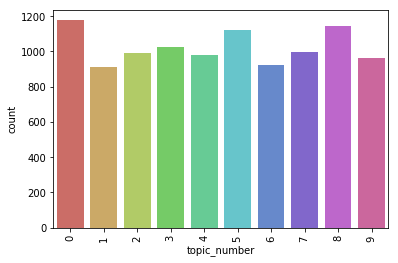

In [69]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(train_news) # TRAIN Document Vector

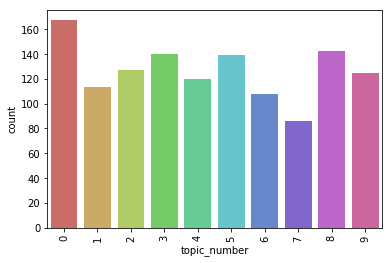

In [70]:
create_distribution(test_news)# TEST Document Vector

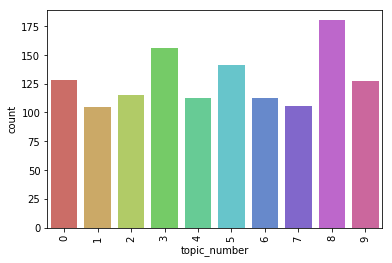

In [71]:
create_distribution(valid_news)# VALID Document Vector

##### Saved the latest dataset into a seperate CSV file 

In [72]:
train_news.to_csv("input_data/train_lda.csv", sep=',')
test_news.to_csv("input_data/test_lda.csv", sep=',')
valid_news.to_csv("input_data/valid_lda.csv", sep=',')

In [75]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class LDATopicModelling():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
        dataTrain = pd.read_csv('input_data/train_lda.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('input_data/test_lda.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', ))#C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['topic_number'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['topic_number'], predicted_LogR)
        print("LDA Topic Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# lda = LDATopicModelling()
# lda.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [76]:
ldaTopicModelling = LDATopicModelling()

LDA Topic Model Trained - accuracy:   0.343602


In [78]:
def DATAMINERS_getLDATopicModellingScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = ldaTopicModelling.predict(text)
    return (float(probValue))

print(DATAMINERS_getLDATopicModellingScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.0663877935623


# Feature 3:  Sensational Feature Analysis

#### [Sensational Words Corpus](https://www.thepersuasionrevolution.com/380-high-emotion-persuasive-words/)

>  Words aren’t just strings of alphabets sewn together with ink. Words are cues. Words are triggers. Words when used correctly can transform an “eh whatever” into “wow that’s it!”. Words can make you go from literally ROFL to fuming with fury to an uncontrollable-urge-to-take-action-NOW-or-the-earth-may-stop-swinging -on-its-axis.

> Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!

Words that are used:
- When you are trying to sell people a solution
- When you are trying to get them to take an action (like, share, subscribe, buy)
- When you are trying to get people to click and read your article
- When you are trying to get someone to agree with you

**There are 1400+ words that are both positive and negative emotions that will help to predict the sensational score for an article**

> I have used these words to perform cosin similarity and predict the sensational similarity score for each news in the give dataset.

In [79]:
columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
dataTrain = pd.read_csv('input_data/train_lda.csv', sep=',', header=None, names = columnNames)
dataTest = pd.read_csv('input_data/test_lda.csv', sep=',', header=None, names = columnNames)

#dropping columns
columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index', 'topic_number', 'lda_score', 'topic_top_words']
train_news = dataTrain.drop(columns=columnsToRemove)
test_news = dataTest.drop(columns=columnsToRemove)
train_news = train_news.loc[1:] 
test_news = test_news.loc[1:]
    

In [83]:
corpus = []
for i in train_news['clean']:
    corpus.append(i)
# corpus

sensational_corpus=[]
sensational_words = pd.read_csv('input_data/sensationalism/sensational_words_dict.csv', sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

1443


## SenticNet:   

#### Data Enrichment 

> It provides polarity associated with 50,000 natural language concepts. A polarity is a floating number between -1 and +1. Minus one is extreme negativity, and plus one is extreme positivity. The knowledge base is free. It can be downloaded as XML file. 
SenticNet 5 reaches 100,000 commonsense concepts by employing recurrent neural networks to infer primitives by lexical substitution.

In [84]:
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
sentic_net = pd.read_csv('input_data/sensationalism/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

('Senticnet Vocab Size: ', 39891)
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [85]:
# sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

2040


## TF-IDF and Cosine Similarity

#### TF-IDF

> TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [87]:
tfidf_corpus.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [89]:
tfidfVec.vocabulary_

{u'foul': 99,
 u'four': 100,
 u'thirst': 930,
 u'controversial': 61,
 u'censored': 42,
 u'rankle': 772,
 u'ontological': 411,
 u'officemax': 393,
 u'tantalizing': 925,
 u'pachinko': 474,
 u'poppy': 616,
 u'reliable': 827,
 u'force': 97,
 u'tired': 935,
 u'preface': 647,
 u'tactile': 924,
 u'pander': 487,
 u'mahmudvand': 165,
 u'poison': 596,
 u'propre': 702,
 u'protection': 708,
 u'humility': 121,
 u'outpace': 441,
 u'military': 249,
 u'campaign': 40,
 u'stink': 910,
 u'prurience': 717,
 u'plot': 586,
 u'played': 580,
 u'music': 304,
 u'calm': 39,
 u'recommend': 788,
 u'peeping': 527,
 u'muse': 302,
 u'aware': 17,
 u'excellent': 84,
 u'transparency': 967,
 u'mindedness': 255,
 u'purgative': 735,
 u'in': 124,
 u'organized': 427,
 u'misperceive': 262,
 u'recovery': 792,
 u'amazing': 4,
 u'toehold': 942,
 u'toxic': 958,
 u'outlawed': 440,
 u'provability': 711,
 u'president': 660,
 u'law': 136,
 u'splendid': 907,
 u'effective': 80,
 u'proprioception': 703,
 u'operate': 416,
 u'nonsensical'

In [90]:
train_tfidf = tfidfVec.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


# valid_tfidf = tfidfVec.fit_transform(valid_news['clean'])
# print('Valid dim:', valid_tfidf.shape)
# print(valid_tfidf.A[:10])

('Training dim:', (10239, 1000))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
('Test dim:', (1266, 1000))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



#### Cosine Similarity Score

> The cosine similarity between two vectors (or two documents on the Vector Space) is a measure that calculates the cosine of the angle between them. This metric is a measurement of orientation and not magnitude, it can be seen as a comparison between documents on a normalized space because we’re not taking into the consideration only the magnitude of each word count (tf-idf) of each document, but the angle between the documents.

> I have compared the sentiment vector of each doucment and estimated a similarity score which is saved as a column in the training and test dataset. 

In [91]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [92]:
train_news['sensational_score'] = similarity_score
train_news.head(5)

,headline_text,clean,sensational_score
1.0,When did the decline of coal start? It started...,decline coal start start natur gas took start ...,0.061786
2.0,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agre john mccain vote give geo...,0.059743
3.0,Health care reform legislation is likely to ma...,health care reform legis like mandat free sex ...,0.052559
4.0,The economic turnaround started at the end of ...,econom turnaround start end term,0.066800
5.0,The Chicago Bears have had more starting quart...,chicago bear start quarterback last year total...,0.048691


In [93]:
corpus = []
for i in test_news['clean']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
test_news['sensational_score'] = similarity_score
test_news.head(5)

,headline_text,clean,sensational_score
1.0,Wisconsin is on pace to double the number of l...,wisconsin pace doubl number layoff year,0.019047
2.0,Says John McCain has done nothing to help the ...,say john mccain done noth help vet,0.026551
3.0,Suzanne Bonamici supports a plan that will cut...,suzanne bonamici support plan cut choice medic...,0.061022
4.0,When asked by a reporter whether hes at the ce...,ask report whether he center crimini scheme vi...,0.065230
5.0,Over the past five years the federal governmen...,past five year feder govern paid million retir...,0.066946


##### Saved the latest dataset into a seperate CSV file 

In [69]:
train_news.to_csv("input_data/train_sensationalism.csv", sep=',')
test_news.to_csv("input_data/test_sensationalism.csv", sep=',')
valid_news.to_csv("input_data/valid_sensationalism.csv", sep=',')

In [70]:
import numpy as np
columnNames = ["jsonid", "headline_text", "clean", "sensational_score"]
dataTrain = pd.read_csv('input_data/train_sensationalism.csv', sep=',', header=None, names = columnNames)
dataTest = pd.read_csv('input_data/test_sensationalism.csv', sep=',', header=None, names = columnNames)

dataTrain = dataTrain.loc[1:]
dataTest = dataTest.loc[1:]


dataTrain.head(5)

,jsonid,headline_text,clean,sensational_score
1,1.0,When did the decline of coal start? It started...,decline coal start start natur gas took start ...,0.0617855637213337
2,2.0,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agre john mccain vote give geo...,0.05974269381960995
3,3.0,Health care reform legislation is likely to ma...,health care reform legis like mandat free sex ...,0.05255867153636662
4,4.0,The economic turnaround started at the end of ...,econom turnaround start end term,0.0667999552542814
5,5.0,The Chicago Bears have had more starting quart...,chicago bear start quarterback last year total...,0.04869082661404933


In [71]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer


class SensationalismFeature():

    def __init__(self):        

        columnNames = ["jsonid", "headline_text", "clean", "sensational_score"]
        dataTrain = pd.read_csv('input_data/train_sensationalism.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('input_data/test_sensationalism.csv', sep=',', header=None, names = columnNames)
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
            
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df = 30, use_idf = True, smooth_idf = True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf', LogisticRegression(solver='liblinear', C = 32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'], dataTrain['sensational_score'].astype(str))
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['sensational_score'].astype(str), predicted_LogR)
        print("Sensationalism Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sf = SensationalismFeature()
# sf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sensationalism Model Trained - accuracy:   0.031596


In [72]:
def DATAMINERS_getSensationalismScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = sf.predict(text)
    return (float(probValue*100))

print(DATAMINERS_getSensationalismScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.010105770859692713


# Feature 4: Political Affiliation Model 

In [73]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import itertools

class PartyAffiliation():
    
    # API to check whether the subject(Headline) is present in the 
    # - democrats most used words if the party affiliation is democrat
    # - republicans most used words if the part affiliation is republican
    def partyAffiliationFromHeadline(self, r):
        v = r['subject_str']
        p = r['party_str']
        if (p =='democrat'):
            s2 = set(self.countDemV.get_feature_names())
        if (p =='republican'):
            s2 = set(self.countRepV.get_feature_names())
        if (p != 'democract' and p !='republican'):
            return 1 #'true'        
        if set(v).intersection(s2):
            return 1 #'true'
        else:
            return 0 #'false'

    #API to convert true, mostly-true and half-true to true
    # false, barely-true and pants-fire to false
    def convertMulticlassToBinaryclass(self, r):
        v = r['label']
        if (v == 'true'):
            return 1 #'true'
        if (v == 'mostly-true'):
            return 1 #'true'
        if (v == 'half-true'):
            return 1 #'true'
        if (v == 'barely-true'):
            return 0 #'false'
        if (v == 'false'):
            return 0 #'false'
        if (v == 'pants-fire'):
            return 0 #'false'
            
            
            
    def plot_confusion_matrix(self, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')       
            
    
    def __init__(self):        

        columnNamesPar = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrainPar = pd.read_csv('input_data/dataset/train.tsv', sep='\t', header=None, names = columnNamesPar)
        dataValidatePar = pd.read_csv('input_data/dataset/valid.tsv', sep='\t', header=None, names = columnNamesPar)
        dataTestPar = pd.read_csv('input_data/dataset/test.tsv', sep='\t', header=None, names = columnNamesPar)
        
    
        # Remove unwanted columns in the dataset
        columnsToRemovePar = ['id', 'speaker', 'context','speaker_job_title', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrainPar = dataTrainPar.drop(columns=columnsToRemovePar)
        dataValidatePar = dataValidatePar.drop(columns=columnsToRemovePar)
        dataTestPar = dataTestPar.drop(columns=columnsToRemovePar)
        
        # convert the labels to true and false only
        dataTrainPar['label'] = dataTrainPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataValidatePar['label'] = dataValidatePar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataTestPar['label'] = dataTestPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        
        # display all the party affiliations and show the count of each party 
#         dataTrainPar.groupby('party_affiliation').count()[['state_info']].rename(
#         columns={'state_info': 'count'}).sort_values(
#         'count', ascending=False).reset_index().plot.bar(
#         x='party_affiliation', y='count', figsize=(16, 10), fontsize=18);
        
        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations
        rowsToRemove = ['Moderate', 'activist', 'business-leader', 'columnist', 'constitution-party', 'democratic-farmer-labor', 'education-official', 'government-body', 'green', 'independent', 'journalist', 'labor-leader', 'liberal-party-canada', 'libertarian', 'nan', 'newsmaker', 'ocean-state-tea-party-action', 'organization', 'state-official', 'talk-show-host', 'tea-party-member']

        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'Moderate']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'activist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'business-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'columnist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'constitution-party']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'democratic-farmer-labor']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'education-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'government-body']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'green']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'independent']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'journalist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'labor-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'liberal-party-canada']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'libertarian']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'nan']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'newsmaker']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'organization']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'state-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'talk-show-host']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'tea-party-member']

        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations

        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'Moderate']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'activist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'business-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'columnist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'constitution-party']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'democratic-farmer-labor']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'education-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'government-body']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'green']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'independent']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'journalist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'labor-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'liberal-party-canada']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'libertarian']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'nan']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'newsmaker']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'organization']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'state-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'talk-show-host']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'tea-party-member']

        
        dataTrainPar['party_str'] = dataTrainPar['party_affiliation'].astype(str)
        dataTestPar['party_str'] = dataTestPar['party_affiliation'].astype(str)
        

        #predicting truth level
#        dataTrainPar.groupby('label').count()[['party_affiliation']].reset_index().plot.bar(x='label', y='party_affiliation')
        
        # get the most used democrat words
        self.countDemV = CountVectorizer(stop_words='english', min_df=40, max_df=80, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        dataTrainDem= dataTrainPar
        dataTrainDem = dataTrainPar.loc[dataTrainPar['party_str'] == 'democrat']
        dem_count = self.countDemV.fit_transform(dataTrainDem['statement'].values)
        
        #get the republican most used words
        
        self.countRepV = CountVectorizer(stop_words='english', min_df=20, max_df=40, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        dataTrainRep= dataTrainPar
        dataTrainRep = dataTrainPar.loc[dataTrainPar['party_str'] == 'republican']
        rep_count = self.countRepV.fit_transform(dataTrainRep['statement'].values)

        dataTestDem= dataTestPar
        dataTestDem = dataTestPar.loc[dataTestPar['party_str'] == 'democrat']
        
        dataTrainPar['subject_str'] = dataTrainPar['subject'].astype(str).str.split() 
        dataTrainPar['label_str'] = dataTrainPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTestPar['subject_str'] = dataTestPar['subject'].astype(str).str.split() 
        dataTestPar['label_str'] = dataTestPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTrainDem['subject_str'] = dataTrainDem['subject'].astype(str).str.split() 
        dataTrainDem['label_str'] = dataTrainDem.apply(self.partyAffiliationFromHeadline, axis=1)
    
        dataTestDem['subject_str'] = dataTestDem['subject'].astype(str).str.split() 
        dataTestDem['label_str'] = dataTestDem.apply(self.partyAffiliationFromHeadline, axis=1)
        
        
        self.model = LogisticRegression()
        self.model = self.model.fit(dataTrainPar['label_str'].values.reshape(-1, 1), dataTrainPar['label'].values)
        predicted_LogR = self.model.predict(dataTestPar['label_str'].values.reshape(-1, 1))
        score = metrics.accuracy_score(dataTestPar['label'], predicted_LogR)
        print("Party Affiliation Model Trained - accuracy:   %0.6f" % score)

    
    def predict(self, headline, party):
                
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['subject', 'party_str'])
        dfrme['subject_str'] = headline
        dfrme['party_str'] = party        

        dfrme['subject'] = headline
        dfrme['subject_str'] = dfrme['subject'].astype(str).str.split() 
        dfrme['label_str'] = dfrme.apply(self.partyAffiliationFromHeadline, axis=1)
        
        x = dfrme['label_str'].values.reshape(-1, 1)
        predicted = self.model.predict(x)
        predicedProb = self.model.predict_proba(x)[:,1]
        return predicted, predicedProb
                    
    
##testing code
f = PartyAffiliation()
#pf.predict("Says the Annies List political group supports third-trimester abortions on demand", "republican")

Party Affiliation Model Trained - accuracy:   0.565436


In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import pandas as pd
import numpy as np
import os

def loadJsonFiles(directory, veracity):    
    shouldAppend = False
    for filename in os.listdir(directory):
        df2 = pd.read_json(directory + filename, lines=True)
        if (shouldAppend):
            df = df.append(df2, ignore_index=True, sort=True)      
        else:
            df = df2
        df['veracity'] = veracity
        shouldAppend = True
        
            
    # removing nan values    
    df['source'].fillna("", inplace=True)
    for index, row in df.iterrows():
        if (type(row['authors']) == float):
            df.at[index, 'authors'] = []

            
    #removing unnecessary columns
    df = df.drop(columns=['keywords','meta_data','movies', 'keywords', 'summary', 'publish_date','top_img'])
    return df

def loadDataset():
    dataFake = loadJsonFiles('input_data/politifact/FakeNewsContent/', 0)
    dataReal = loadJsonFiles('input_data/politifact/RealNewsContent/', 1)
    return dataReal, dataFake

dataFake, dataReal = loadDataset()

dataTrainFake = dataFake[:100]
dataTrainReal = dataReal[:100]
dataTestFake = dataFake[101:]
dataTestReal = dataReal[101:]

dataTest = dataTestFake.append(dataTestReal,ignore_index=True, sort=True)      
dataTrain = dataTrainFake.append(dataTrainReal,ignore_index=True, sort=True)    
dataAll = dataFake.append(dataReal, ignore_index=True, sort=True)      
dataAll.head()

,authors,canonical_link,images,source,text,title,url,veracity
0,"[Jack Shafer, Burgess Everett, Seung Min Kim, ...",http://www.politico.com/story/2016/09/zika-fun...,[http://static.politico.com/ae/2d/1a0119fa45b8...,http://politi.co,"""I would encourage our colleagues across the a...",McConnell punts budget vote to buy time for deal,http://politi.co/2cksDqD,1
1,"[Colin Taylor, Grant Stern, Brett Bose, Natali...",http://occupydemocrats.com/2016/09/21/massive-...,[http://occupydemocrats.com/wp-content/uploads...,http://occupydemocrats.com,12k SHARES SHARE THIS STORY\n\nMassive protest...,Massive Protests Erupt In North Carolina After...,http://occupydemocrats.com/2016/09/21/massive-...,1
2,[],http://rightwingnews.com/top-news/famous-dog-k...,[http://rightwingnews.com/wp-content/uploads/2...,http://rightwingnews.com,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,1
3,[],NaN,NaN,,The University of North Dakota is investigatin...,'Locked the black bitch out': White students u...,NaN,1
4,"[Jack Shafer, Robert Strauss]",http://www.politico.com/magazine/story/2016/09...,"[data:image/gif;base64,R0lGODlhAQABAAAAACH5BAE...",http://politi.co,"As my 25th wedding anniversary approached, I t...",Worst. President. Ever.,http://politi.co/2cGdput,1


In [75]:
# from ipynb.fs.full.m_partyaffiliation import PartyAffiliation
partyAffiliation = PartyAffiliation()

Party Affiliation Model Trained - accuracy:   0.565436


In [76]:
def DATAMINERS_getPartyAffiliationScore(headline, partyName): # return between 0 and 1, being 0 = True,  1 = Fake
    if ( (headline == "") | (partyName == "") ):
        return 0
    binaryValue, probValue = partyAffiliation.predict(headline, partyName)
    return (1 - float(probValue))

print(DATAMINERS_getPartyAffiliationScore("Says the Annies List political group supports third-trimester abortions on demand", "republican"))

0.39560573321891


# Feature 5: Click Bait 

In [77]:
class Clickbait():
    
    question_words = ['who', 'whos', 'whose', 'what', 'whats', 'whatre', 'when', 'whenre', 'whens', 'couldnt',
            'where', 'wheres', 'whered', 'why', 'whys', 'can', 'cant', 'could', 'will', 'would', 'is',
            'isnt', 'should', 'shouldnt', 'you', 'your', 'youre', 'youll', 'youd', 'here', 'heres',
            'how', 'hows', 'howd', 'this', 'are', 'arent', 'which', 'does', 'doesnt']

    contractions = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve', 'mustve', 'neednt', 'oclock', 'ol', 'oughtnt',
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'thatll', 'thats', 'thatd', 'thered', 'therednt', 'theredntve',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'theyre', 'theyve', 'theyvent', 'wasnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve', 'wouldve', 'wouldnt', 'wouldntve', 'yall', 'yalldve',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll', 'youre', 'yourent', 'youve', 'youvent']
    
    def process_text(self, text):
        result = text.replace('/', '').replace('\n', '')
        result = re.sub(r'[1-9]+', 'number', result)
        result = re.sub(r'(\w)(\1{2,})', r'\1', result)
        result = re.sub(r'(?x)\b(?=\w*\d)\w+\s*', '', result)
        result = ''.join(t for t in result if t not in punctuation)
        result = re.sub(r' +', ' ', result).lower().strip()
        return result
    
    def cnt_stop_words(self, text):
        s = text.split()
        num = len([word for word in s if word in self.stop])
        return num

    def num_contract(self, text):
        s = text.split()
        num = len([word for word in s if word in self.contractions])
        return num

    def question_word(self, text):
        s = text.split()
        if s[0] in self.question_words:
            return 1
        else:
            return 0

    def part_of_speech(self, text):
        s = text.split()
        nonstop = [word for word in s if word not in self.stop]
        pos = [part[1] for part in nltk.pos_tag(nonstop)]
        pos = ' '.join(pos)
        return pos


    def __init__(self):        
        df_ycb = pd.read_csv('input_data/clickbait/clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ycb['clickbait'] = 1

        df_ncb = pd.read_csv('input_data/clickbait/non_clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ncb['clickbait'] = 0

        df = df_ycb.append(df_ncb, ignore_index=True).reset_index(drop=True)

        

       
        self.stop = stopwords.words('english')
       
        # Creating some latent variables from the data
        df['text']     = df['text'].apply(self.process_text)
        df['question'] = df['text'].apply(self.question_word)

        df['num_words']       = df['text'].apply(lambda x: len(x.split()))
        df['part_speech']     = df['text'].apply(self.part_of_speech)
        df['num_contract']    = df['text'].apply(self.num_contract)
        df['num_stop_words']  = df['text'].apply(self.cnt_stop_words)
        df['stop_word_ratio'] = df['num_stop_words']/df['num_words']
        df['contract_ratio']  = df['num_contract']/df['num_words']

        
        df.drop(['num_stop_words','num_contract'], axis=1, inplace=True)

        df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

        self.tfidf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                                   analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,5),
                                   use_idf=1, smooth_idf=1, sublinear_tf=1)

        X_train_text = self.tfidf.fit_transform(df_train['text'])
        X_test_text  = self.tfidf.transform(df_test['text'])

        self.cvec = CountVectorizer()

        X_train_pos = self.cvec.fit_transform(df_train['part_speech'])
        X_test_pos  = self.cvec.transform(df_test['part_speech'])

        self.scNoMean = StandardScaler(with_mean=False)  # we pass with_mean=False to preserve the sparse matrix
        X_train_pos_sc = self.scNoMean.fit_transform(X_train_pos)
        X_test_pos_sc  = self.scNoMean.transform(X_test_pos)

        X_train_val = df_train.drop(['clickbait','text','part_speech'], axis=1).values
        X_test_val  = df_test.drop(['clickbait','text','part_speech'], axis=1).values

        self.sc = StandardScaler()
        X_train_val_sc = self.sc.fit(X_train_val).transform(X_train_val)
        X_test_val_sc  = self.sc.transform(X_test_val)

        y_train = df_train['clickbait'].values
        y_test  = df_test['clickbait'].values



        X_train = sparse.hstack([X_train_val_sc, X_train_text, X_train_pos_sc]).tocsr()
        X_test  = sparse.hstack([X_test_val_sc, X_test_text, X_test_pos_sc]).tocsr()

        self.model = LogisticRegression(penalty='l2', C=98.94736842105263)
        self.model = self.model.fit(X_train, y_train)
        
        predicted_LogR = self.model.predict(X_test)
        score = metrics.accuracy_score(y_test, predicted_LogR)
        print("Clickbait Model Trained - accuracy:   %0.6f" % score)

#     predict = model.predict(X_test)
#     print(classification_report(y_test, predict))


    def predict(self, text):
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['text'])
        dfrme['text'] = text

        #processing text
        dfrme['text']     = dfrme['text'].apply(self.process_text)

        #adding latent variables
        dfrme['question'] = dfrme['text'].apply(self.question_word)
        dfrme['num_words']       = dfrme['text'].apply(lambda x: len(x.split()))
        dfrme['part_speech']     = dfrme['text'].apply(self.part_of_speech)
        dfrme['num_contract']    = dfrme['text'].apply(self.num_contract)
        dfrme['num_stop_words']  = dfrme['text'].apply(self.cnt_stop_words)
        dfrme['stop_word_ratio'] = dfrme['num_stop_words']/dfrme['num_words']
        dfrme['contract_ratio']  = dfrme['num_contract']/dfrme['num_words']

        #removing latent variables that have high colinearity with other features
        dfrme.drop(['num_stop_words','num_contract'], axis=1, inplace=True)


        Xtxt_val  = dfrme.drop(['text','part_speech'], axis=1).values
        Xtxt_val_sc  = self.sc.transform(Xtxt_val)

        Xtxt_text  = self.tfidf.transform(dfrme['text'])

        Xtxt_pos  = self.cvec.transform(dfrme['part_speech'])
        Xtxt_pos_sc  = self.scNoMean.transform(Xtxt_pos)
        Xtxt  = sparse.hstack([Xtxt_val_sc, Xtxt_text, Xtxt_pos_sc]).tocsr()

        predicted = self.model.predict(Xtxt)
        predicedProb = self.model.predict_proba(Xtxt)[:,1]
        return predicted, predicedProb

In [78]:
# from ipynb.fs.full.m_clickbait import Clickbait
clickBait = Clickbait()

Clickbait Model Trained - accuracy:   0.976875


In [79]:
def DATAMINERS_getClickbaitScore(headline): # return between 0 and 1, being 0 = True,  1 = Fake
    if (headline == ""):
        return 0
    binaryValue, probValue = clickBait.predict(headline)
    return float(probValue)

print(DATAMINERS_getClickbaitScore("Should You bring the money now"))

0.9984636868106773


# Feature 6 : Spam Score

#### Function to simplify label classes

* Original --	True
* True	--	True
* Mostly-true	-- True
* Half-true	-- True
* Barely-true	-- False
* False	-- False
* Pants-fire	-- False

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

class SpamScoreFeature():
    def __init__(self): 
        #load the dataset
        columnNames = ["encoded_label", "headline_text", "sensational_vector"]
        dataTrain = pd.read_csv('input_data/train_sensational_feature.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('input_data/test_sensational_feature.csv', sep=',', header=None, names = columnNames)
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
        
        #load the spam dictionary
        spam_dict = pd.read_csv('input_data/spam/spam_dict.csv', usecols= [1], names = ['spamword'], encoding='latin-1', error_bad_lines=False)
        spam_dict = spam_dict.fillna(0)
        spam_dict = spam_dict.iloc[1:]
        spam_dict = spam_dict.drop_duplicates()

        # spam_dict.head(5)
        #Count vector for train data
        spamcountV = CountVectorizer(vocabulary=list(set(spam_dict['spamword'])))
        train_count = spamcountV.fit_transform(dataTrain['headline_text'])
       
   
        self.logR_pipeline = Pipeline([
            ('NBCV',spamcountV),
            ('nb_clf',MultinomialNB())])

        self.logR_pipeline.fit(dataTrain['headline_text'], dataTrain['encoded_label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['encoded_label'], predicted_LogR)
        print("Spam Score Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
spamscore = SpamScoreFeature()
spamscore.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Spam Score Model Trained - accuracy:   0.563191


(True, 0.5617736107041701)

In [81]:
def DATAMINERS_getSpamScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = spamscore.predict(text)
    return (float(probValue))

print(DATAMINERS_getSpamScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.5617736107041701


#### Read the input data files

# Feature 7 : Author Credibility

In [17]:
dataAllAuthorsVeracity = dataAll.copy()

fakeZero = 0
fakeOne = 0
falseMoreThanOne = 0
trueZero = 0
trueOne = 0
trueMoreThanOne = 0
for index, row in dataAllAuthorsVeracity.iterrows():
    authorsCount = len(row['authors'])
    dataAllAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
    if (authorsCount == 0):
        if (row['veracity'] == 1):
            trueZero += 1
        else:
            fakeZero += 1
    elif (authorsCount == 1):
        if (row['veracity'] == 1):
            trueOne += 1
        else:
            fakeOne += 1
    elif (authorsCount > 1):
        if (row['veracity'] == 1):
            trueMoreThanOne += 1
        else:
            falseMoreThanOne += 1

print("trueZeroAuthors=", trueZero)
print("fakeZeroAuthors=", fakeZero)
print("trueOneAuthors=", trueOne)
print("fakeOneAuthors=", fakeOne)
print("trueMoreThanOneAuthors=", trueMoreThanOne)
print("fakeMoreThanOneAuthors=", falseMoreThanOne)

columnsToRemove = ['authors', 'canonical_link', 'images', 'source','url', 'text', 'title']
dataAllAuthorsVeracityFull = dataAllAuthorsVeracity
dataAllAuthorsVeracity = dataAllAuthorsVeracity.drop(columns=columnsToRemove)
dataAllAuthorsVeracity.head(5)

('trueZeroAuthors=', 13)
('fakeZeroAuthors=', 85)
('trueOneAuthors=', 36)
('fakeOneAuthors=', 24)
('trueMoreThanOneAuthors=', 71)
('fakeMoreThanOneAuthors=', 11)


,veracity,authors_count
0,1,4.0
1,1,4.0
2,1,0.0
3,1,0.0
4,1,2.0


In [42]:
d = dataAllAuthorsVeracity
d.loc[dataAllAuthorsVeracity['veracity'] == 1]
#d.head(10)

,veracity,authors_count
0,1,4.0
1,1,4.0
2,1,0.0
3,1,0.0
4,1,2.0
5,1,7.0
6,1,2.0
7,1,0.0
8,1,1.0
9,1,1.0


In [18]:
dataAllAuthorsVeracityFull.head(5)

,authors,canonical_link,images,source,text,title,url,veracity,authors_count
0,"[Jack Shafer, Burgess Everett, Seung Min Kim, ...",http://www.politico.com/story/2016/09/zika-fun...,[http://static.politico.com/ae/2d/1a0119fa45b8...,http://politi.co,"""I would encourage our colleagues across the a...",McConnell punts budget vote to buy time for deal,http://politi.co/2cksDqD,1,4.0
1,"[Colin Taylor, Grant Stern, Brett Bose, Natali...",http://occupydemocrats.com/2016/09/21/massive-...,[http://occupydemocrats.com/wp-content/uploads...,http://occupydemocrats.com,12k SHARES SHARE THIS STORY\n\nMassive protest...,Massive Protests Erupt In North Carolina After...,http://occupydemocrats.com/2016/09/21/massive-...,1,4.0
2,[],http://rightwingnews.com/top-news/famous-dog-k...,[http://rightwingnews.com/wp-content/uploads/2...,http://rightwingnews.com,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,1,0.0
3,[],NaN,NaN,,The University of North Dakota is investigatin...,'Locked the black bitch out': White students u...,NaN,1,0.0
4,"[Jack Shafer, Robert Strauss]",http://www.politico.com/magazine/story/2016/09...,"[data:image/gif;base64,R0lGODlhAQABAAAAACH5BAE...",http://politi.co,"As my 25th wedding anniversary approached, I t...",Worst. President. Ever.,http://politi.co/2cGdput,1,2.0


In [19]:
dataTrainAuthorsVeracity = dataTrain.copy()
dataTestAuthorsVeracity = dataTest.copy()

for index, row in dataTrainAuthorsVeracity.iterrows():
    dataTrainAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])

for index, row in dataTestAuthorsVeracity.iterrows():
    dataTestAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
            

In [20]:
import matplotlib.pyplot as plt
X_train = dataTrainAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_train = dataTrainAuthorsVeracity['veracity'].values
X_test = dataTestAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_test = dataTestAuthorsVeracity['veracity'].values.reshape(-1, 1)


from sklearn import linear_model
logClassifierAuthorsCount = linear_model.LogisticRegression(solver='liblinear', C=1, random_state=111)
logClassifierAuthorsCount.fit(X_train, Y_train)
predicted = logClassifierAuthorsCount.predict(X_test)

from sklearn import metrics
print("accuracy=", metrics.accuracy_score(Y_test, predicted))

('accuracy=', 0.8421052631578947)


In [21]:
def DATAMINERS_getAuthorScore(numAuthors): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(numAuthors).reshape(-1, 1)
    predicted = logClassifierAuthorsCount.predict(x)
    predicedProbTrue = logClassifierAuthorsCount.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProbTrue)

print(DATAMINERS_getAuthorScore(4))

0.0156601378514


# Feature 8 : Source Reputation

In [22]:
import pandas as pd
dataFakeNewsSites = pd.read_csv("input_data/politifact-fakenews-sites.csv")
dataFakeNewsSites.head()

,site name,type of site,registration
0,16wmpo.com,imposter site,"scottsdale, ariz. **"
1,24online.news,imposter site,"panama, pa. **"
2,24wpn.com,fake news,"veles, macedonia"
3,24x365live.com,fake news,"kobenhavn, denmark"
4,247newsmedia.com,fake news,"kumanovo, macedonia"


In [23]:
dataFakeNewsSites['type of site'].unique()

array(['imposter site', 'fake news', 'parody site', 'some fake stories'],
      dtype=object)

As we can see, the sources are classified in different categories. Almost are all fake (fake news, parody,..) except the category 'some fake stories'. So let's hot encode those categories as 1 for fake news and 0.5 for some fake news.

In [24]:
for index, row in dataFakeNewsSites.iterrows():
    score = 1
    if (row['type of site'] == 'some fake stories'):
        score = 0.5
    dataFakeNewsSites.at[index, 'fake_score'] = score

dataFakeNewsSites.head()

,site name,type of site,registration,fake_score
0,16wmpo.com,imposter site,"scottsdale, ariz. **",1.0
1,24online.news,imposter site,"panama, pa. **",1.0
2,24wpn.com,fake news,"veles, macedonia",1.0
3,24x365live.com,fake news,"kobenhavn, denmark",1.0
4,247newsmedia.com,fake news,"kumanovo, macedonia",1.0


In [25]:
def DATAMINERS_getSourceReputationScore(source): # return between 0 and 1, being 0 = True,  1 = Fake
    if (source == ""):
        return 0
    d = dataFakeNewsSites[dataFakeNewsSites['site name'].str.match(source)]
    if (d['fake_score'].empty):
        return 0
    return int(d['fake_score'].values)


DATAMINERS_getSourceReputationScore('24wpn')

1

# Feature 9 : Content Length

Model slope:     2.8672921260228002e-05
Model intercept: 0.41180985978637996
R2 score: 0.04612397796223422


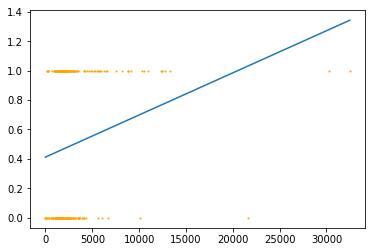

In [90]:
dataAllBodyLength = dataAll.copy()
for index, row in dataAllBodyLength.iterrows():
    textLength = len(row['text'])
    dataAllBodyLength.at[index, 'text_length'] = textLength


import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
linearRegressionBodyLength = LinearRegression(fit_intercept=True)

A = np.array(list(dataAllBodyLength.text_length))
B = np.array(list(dataAllBodyLength.veracity))

linearRegressionBodyLength.fit(A[:, np.newaxis], B)

xfit = np.linspace(-1, max(dataAllBodyLength.text_length), 1000)
yfit = linearRegressionBodyLength.predict(xfit[:, np.newaxis])

plt.scatter(A, B, s=1, c="orange")
plt.plot(xfit, yfit);

print("Model slope:    ", linearRegressionBodyLength.coef_[0])
print("Model intercept:", linearRegressionBodyLength.intercept_)
print("R2 score:", linearRegressionBodyLength.score(A[:, np.newaxis], B))

In [91]:
for index, row in dataTrain.iterrows():
    textLength = len(row['text'])
    dataTrain.at[index, 'text_length'] = textLength

for index, row in dataTest.iterrows():
    textLength = len(row['text'])
    dataTest.at[index, 'text_length'] = textLength

from sklearn import linear_model
# from sklearn import linear_model

logClassifierBodyLength = linear_model.LogisticRegression(solver='liblinear', C=17/1000, random_state=111)
logClassifierBodyLength.fit(dataTrain['text_length'].values.reshape(-1, 1), dataTrain['veracity'].values)

predicted = logClassifierBodyLength.predict(dataTest['text_length'].values.reshape(-1, 1))

from sklearn import metrics
print(metrics.accuracy_score(dataTest['veracity'].values.reshape(-1, 1), predicted))

0.5


In [92]:
def DATAMINERS_getBodyLengthScore(length): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(length).reshape(-1, 1)
    predicted = logClassifierBodyLength.predict(x)
    predicedProb = logClassifierBodyLength.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProb)

print(DATAMINERS_getBodyLengthScore(12000))

0.242045772398491


# Feature 10 : Word Frequency

In [93]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics

class WordFrequency():

    def __init__(self):        

        columnNames = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrain = pd.read_csv('input_data/dataset/train.tsv', sep='\t', header=None, names = columnNames)
        dataValidate = pd.read_csv('input_data/dataset/valid.tsv', sep='\t', header=None, names = columnNames)
        dataTest = pd.read_csv('input_data/dataset/test.tsv', sep='\t', header=None, names = columnNames)
        
        #dropping columns
        columnsToRemove = ['id','subject', 'speaker', 'context','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataValidate = dataValidate.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)

        def convertMulticlassToBinaryclass(r):
            v = r['label']
            if (v == 'true'):
                return 'true'
            if (v == 'mostly-true'):
                return 'true'
            if (v == 'half-true'):
                return 'true'
            if (v == 'barely-true'):
                return 'false'
            if (v == 'false'):
                return 'false'
            if (v == 'pants-fire'):
                return 'false'
        dataTrain['label'] = dataTrain.apply(convertMulticlassToBinaryclass, axis=1)
        dataValidate['label'] = dataValidate.apply(convertMulticlassToBinaryclass, axis=1)
        dataTest['label'] = dataTest.apply(convertMulticlassToBinaryclass, axis=1)
        

    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        train_tfidf = tfidfV.fit_transform(dataTrain['statement'].values)
        test_tfidf = tfidfV.fit_transform(dataTest['statement'].values)

#         print('TF-IDF VECTORIZER')

        ## Removing plurals for the tokens using PorterStemmer
        stemmer = PorterStemmer()
        tfidfVPlurals= tfidfV.get_feature_names()
        tfidfVSingles= [stemmer.stem(plural) for plural in tfidfVPlurals]

        # Applying Set to remove duplicates
        tfidfVTokens = list(set(tfidfVSingles))
#         print('TFIDFV Tokens')
#         print(tfidfVTokens)

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['statement'],dataTrain['label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['statement'])
        score = metrics.accuracy_score(dataTest['label'], predicted_LogR)
        print("Word Frequency Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# wf = WordFrequency()
# wf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [94]:
# from ipynb.fs.full.m_wordfrequency import WordFrequency
wordFrequency = WordFrequency()

Word Frequency Model Trained - accuracy:   0.599053


In [95]:
def DATAMINERS_getWordFrequencyScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = wordFrequency.predict(text)
    return (1 - float(probValue))

print(DATAMINERS_getWordFrequencyScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.5104703891221564


# FINAL COMBINED MODEL

In [96]:
# import warnings
# warnings.filterwarnings('ignore')

def isFakeNews(text, headline="", numAuthors = 0, source = "", party =""):
    accur = [0.84, 0.56, 0.95, 0.35,  0.1 ,0.54, 0.98, 0.71, 0.6, 1] # using the (normalized) accuracy as weigths
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0
    prob = []
    prob.append(w[0] * DATAMINERS_getAuthorScore(numAuthors))
    sumW += w[0]
    if ( (headline != "") & (party != "")):
        prob.append(w[1] * DATAMINERS_getPartyAffiliationScore(headline, party))
        sumW += w[1]
    if (headline != ""):
        prob.append(w[2] * DATAMINERS_getClickbaitScore(headline))
        sumW += w[2]
    if (headline != ""):
        prob.append(w[3] * DATAMINERS_getSentimentAnalysisScore(headline))
        sumW += w[3]
    if (headline != ""):
        prob.append(w[4] * DATAMINERS_getLDATopicModellingScore(headline))
        sumW += w[4]
    if (headline != ""):
        prob.append(w[5] * DATAMINERS_getSensationalismScore(headline))
        sumW += w[5]
    if (headline != ""):
        prob.append(w[6] * DATAMINERS_getSpamScore(headline))
        sumW += w[6]
    prob.append(w[7] * DATAMINERS_getBodyLengthScore(len(text)))
    sumW += w[7]
    prob.append(w[8] * DATAMINERS_getWordFrequencyScore(text))
    sumW += w[8]
    if (party != ""):
        prob.append(w[9] * DATAMINERS_getSourceReputationScore(source))
        sumW += w[9]
    
    probTotal = sum(prob[0:len(prob)]) / sumW
    return probTotal
    
result = isFakeNews("Yesterday, the Brazilian soccer team won the world cup by defeating Argentina", "World Cup ends", 1, "cnn.com", "republican")

if result > 0.5:
    print("is FAKE NEWS!!!")
else:
    print("it is NOT fake news!!!")
            

it is NOT fake news!!!


## Performance analysis 

In [97]:
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for index, row in dataTest.iterrows():
    text = row['text']
    headline= row['title']
    numAuthors = len(row['authors'])
    source = row['source']
    party = ""
    if 'party' in dataTest.columns:
        party = row['party']
    pred = isFakeNews(text, headline, numAuthors, source, party)
    if ((row['veracity'] == 1) &  (pred < 0.5) ):
        truePos += 1
    elif ((row['veracity'] == 0) & (pred >= 0.5) ):
        trueNeg += 1
    elif ((row['veracity'] == 1) &  (pred >= 0.5) ):
        falsePos += 1            
    elif ((row['veracity'] == 0) &  (pred < 0.5) ):
        falseNeg += 1
        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("accuracy=", (truePos/(truePos+falseNeg)))

truePos= 18
trueNeg= 6
falsePos= 1
falseNeg= 13
accuracy= 0.5806451612903226


If we add some error margin, let's say 10p.p to make our model only trust the results beyong that margin, we have:
    

In [98]:
errorMargin = 0.10
ignored = 0
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for index, row in dataTest.iterrows():
    text = row['text']
    headline= row['title']
    numAuthors = len(row['authors'])
    source = row['source']
    party = ""
    if 'party' in dataTest.columns:
        party = row['party']
    pred = isFakeNews(text, headline, numAuthors, source, party)

    if (abs(0.5 - pred) < errorMargin):
        ignored += 1
    elif ((row['veracity'] == 1) &  (pred < 0.5) ):
        truePos += 1
    elif ((row['veracity'] == 0) & (pred >= 0.5) ):
        trueNeg += 1
    elif ((row['veracity'] == 1) &  (pred >= 0.5) ):
        falsePos += 1            
    elif ((row['veracity'] == 0) &  (pred < 0.5) ):
        falseNeg += 1

        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("ignored=", ignored)
print("accuracy=", (truePos/(truePos+falseNeg)))

truePos= 11
trueNeg= 2
falsePos= 0
falseNeg= 3
ignored= 22
accuracy= 0.7857142857142857
